<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EE25737:-Introduction-to-Machine-Learning" data-toc-modified-id="EE25737:-Introduction-to-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><font color="black">EE25737: Introduction to Machine Learning</font></a></span><ul class="toc-item"><li><span><a href="#Implementation-of-some-algorithms-by-NumPy/SciPy" data-toc-modified-id="Implementation-of-some-algorithms-by-NumPy/SciPy-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Implementation of some algorithms by NumPy/SciPy</a></span><ul class="toc-item"><li><span><a href="#[your-name]" data-toc-modified-id="[your-name]-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>[your name]</a></span></li><li><span><a href="#[your-ID]" data-toc-modified-id="[your-ID]-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>[your ID]</a></span></li></ul></li><li><span><a href="#2.-Logistic-regression" data-toc-modified-id="2.-Logistic-regression-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. Logistic regression</a></span></li><li><span><a href="#3.-Online-Linear-Regression" data-toc-modified-id="3.-Online-Linear-Regression-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3. Online Linear Regression</a></span></li></ul></li></ul></div>

# <font color='black'>EE25737: Introduction to Machine Learning</font>
## Implementation of some algorithms by NumPy/SciPy

### [Ali Arasteh]
### [96101165]

## Import

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In this assignment, you will implement some learning algorithms only using Linalg and without using scikit-learn.


###### Load data


## 2. Logistic regression

Import data with pandas library.
Print the first five row of the data. There are 14 column in dataset. The first 12 are features and the quality column is the label.

In [2]:
# load dataset
data = pd.read_csv("JuiceQuality.csv")
data = data.loc[:, 'fixed acidity':'quality']
# X= ::
X = data.loc[:, 'fixed acidity':'Vit Indx']
# y= ::
Y = data.loc[:, 'quality']
data.head(5)

fixed acidity  volatile acidity  citric acid residual sugar  chlorides  \
0            5.9              0.32         0.39            low      0.114   
1            7.8              0.24         0.18           high      0.046   
2            7.7              0.58         0.01       very_low      0.088   
3            8.3              0.18         0.30       very_low      0.033   
4            6.5               NaN         0.31       very_low      0.044   

   free sulfur dioxide  total sulfur dioxide     A Indx  density    pH  \
0                 24.0                 140.0  13.905151  0.99340  3.09   
1                 33.0                 160.0  17.130070  0.99630  3.20   
2                 12.0                  18.0  15.618966  0.99568   NaN   
3                 20.0                  57.0  18.085322  0.99109  3.02   
4                  NaN                 127.0  13.968160  0.99280  3.49   

  sulphates  Vit Indx quality  
0       low  very_low    high  
1    medium       low    high  
2    medium       low    high  
3    medium    medium    high  
4       low       low    high

In this section, you need to prepare your data. One of the problems you may face in datasets are missing values. There are various strategies to treat missing values. First, you can delete any sample with missing values. Another method is to fill missing values with mean of the feature. 

### Make Categorical data numeric

In [3]:
map = {
    'residual sugar': {'very_low': 1, 'low': 2, 'medium': 3, 'high': 4,'very_high': 5}, 
    'sulphates': {'low': 1, 'medium': 2, 'high': 3,'very_high': 4},
    'Vit Indx': {'very_low': 1, 'low': 2, 'medium': 3, 'high': 4,'very_high': 5},
    'quality': {'low': 0,'high': 1}
}
data.replace(map, inplace = True)

In [4]:
# delete any sample with a missing value
data1 = data.dropna()
print(len(data1))
# X1= ::
X1 = data1.loc[:, 'fixed acidity':'Vit Indx']
print
# y1= ::
Y1 = data1.loc[:, 'quality']
# replace missing values with mean of the features for both X and y
data2 = data.fillna(data.mean())
# X2= ::
X2 = data2.loc[:, 'fixed acidity':'Vit Indx']
# y2= ::
Y2 = data2.loc[:, 'quality']

3358


Implement the Logistic regression algorithm. You can change everything in the cell below.

In [5]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        
    def fit (self,X,y) :
      m = X.shape[0]
      n = X.shape[1]
      if self.fit_intercept:
        X = np.c_[np.ones(m), X]
        n += 1
      W = np.zeros(n)
      for i in range(self.num_iter):
        P = 1 / (1 + np.exp(np.dot(X, W)))
        W += 1 / m * np.dot(P - y, X) * self.lr
      return self.predict(1 / (1 + np.exp(np.matmul(X, W)))), W
      
    def predict(self,X) :
      threshold = 0.5
      return np.array([1 if Xi >= threshold else 0 for Xi in X])

Note that you should plot the dataset alongside the seprator line generated by Logistic regression using the first two features in both dataset generated after missing values treatment and for different learning rates. Also report accuracy for classification using all features for different learning rates, lr= {0.01, 0.1, 1, 10}.

Model accuracy for first cleaning method = 66.31923764145324
Model accuracy for second cleaning method = 62.92134831460674


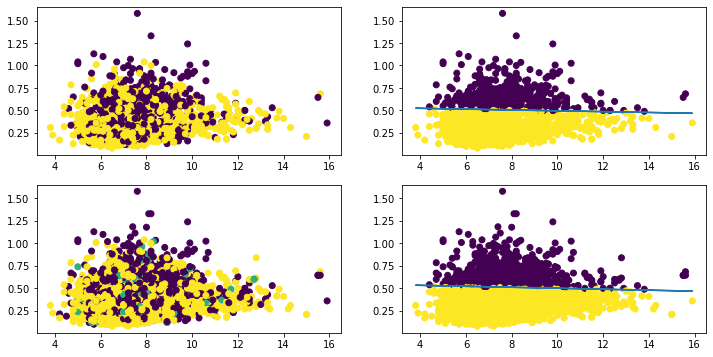

In [6]:
X_1 = X1[['fixed acidity', 'volatile acidity']].values
y_1 = Y1.values
model = LogisticRegression()
Prediction1, W1 = model.fit(X_1, y_1)
print('Model accuracy for first cleaning method =', (y_1 == Prediction1).sum() / len(X_1) * 100)
X_2 = X2[['fixed acidity', 'volatile acidity']].values
y_2 = Y2.values
model = LogisticRegression()
Prediction2, W2 = model.fit(X_2, y_2)
print('Model accuracy for second cleaning method =', (y_2 == Prediction2).sum() / len(X_2) * 100)
fig = plt.figure(figsize=(12,6))
sub11 = fig.add_subplot(221)
sub11.scatter(X_1[:, 0].T, X_1[:, 1].T, c=y_1)
sub12 = fig.add_subplot(222)
sub12.scatter(X_1[:, 0].T, X_1[:, 1].T, c=Prediction1)
sub12.plot(X_1[:, 0].T, -W1[1] / W1[2] * X_1[:, 0].T - W1[0] / W1[2])
sub21 = fig.add_subplot(223)
sub21.scatter(X_2[:, 0].T, X_2[:, 1].T, c=y_2)
sub22 = fig.add_subplot(224)
sub22.scatter(X_2[:, 0].T, X_2[:, 1].T, c=Prediction2)
sub22.plot(X_2[:, 0].T, -W2[1] / W2[2] * X_2[:, 0].T - W2[0] / W2[2])

After deleting outlier data

Model accuracy for first cleaning method = 66.49166151945646
Model accuracy for second cleaning method = 62.67347264316477


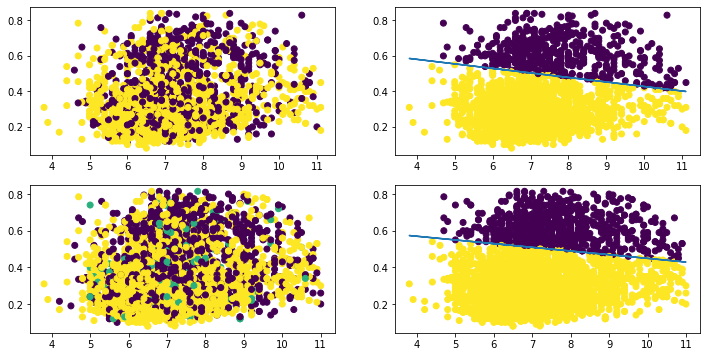

In [7]:
X_1 = X1[['fixed acidity', 'volatile acidity']]
temp = X_1.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)
X_1 = X_1[temp].values
y_1 = Y1[temp].values
model = LogisticRegression()
Prediction1, W1 = model.fit(X_1, y_1)
print('Model accuracy for first cleaning method =', (y_1 == Prediction1).sum() / len(X_1) * 100)
X_2 = X2[['fixed acidity', 'volatile acidity']]
temp = X_2.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)
X_2 = X_2[temp].values
y_2 = Y2[temp].values
model = LogisticRegression()
Prediction2, W2 = model.fit(X_2, y_2)
print('Model accuracy for second cleaning method =', (y_2 == Prediction2).sum() / len(X_2) * 100)
fig = plt.figure(figsize=(12,6))
sub11 = fig.add_subplot(221)
sub11.scatter(X_1[:, 0].T, X_1[:, 1].T, c=y_1)
sub12 = fig.add_subplot(222)
sub12.scatter(X_1[:, 0].T, X_1[:, 1].T, c=Prediction1)
sub12.plot(X_1[:, 0].T, -W1[1] / W1[2] * X_1[:, 0].T - W1[0] / W1[2])
sub21 = fig.add_subplot(223)
sub21.scatter(X_2[:, 0].T, X_2[:, 1].T, c=y_2)
sub22 = fig.add_subplot(224)
sub22.scatter(X_2[:, 0].T, X_2[:, 1].T, c=Prediction2)
sub22.plot(X_2[:, 0].T, -W2[1] / W2[2] * X_2[:, 0].T - W2[0] / W2[2])

With all featurs

In [8]:
X_1 = X1.loc[:, 'fixed acidity':'Vit Indx']
temp = X_1.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)
X_1 = X_1[temp].values
y_1 = Y1[temp].values
model = LogisticRegression()
Prediction1, W1 = model.fit(X_1, y_1)
print('Model accuracy for first cleaning method =', (y_1 == Prediction1).sum() / len(X_1) * 100)
X_2 = X2.loc[:, 'fixed acidity':'Vit Indx']
temp = X_2.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)
X_2 = X_2[temp].values
y_2 = Y2[temp].values
model = LogisticRegression()
Prediction2, W2 = model.fit(X_2, y_2)
print('Model accuracy for second cleaning method =', (y_2 == Prediction2).sum() / len(X_2) * 100)

Model accuracy for first cleaning method = 64.33811802232854
Model accuracy for second cleaning method = 65.74227831285287


## 3. Online Linear Regression 

In this question you will simulate an online linear regressor.
For more informain refer to the HW description file.

In the code cell below you should prepare your data as introduced in the first part of 'Linear Regression' question.
For convenience, you may load the whole original dataset and do the jobs required from beginning on the original given data in the HW folder or you can use results from previous parts.

In [9]:
X = data1[['fixed acidity', 'volatile acidity', 'citric acid']][:370].values
y = data1['A Indx'][:370].values

In the code block below you should write your funcion which is a Gradient Descent optimizer.

In [10]:
def GD(X, y, Eta, W, iteration, error):
    m = X.shape[0]
    X = np.c_[X, np.ones(m)]
    i = 1
    p = np.dot(X, W)
    MSE = np.sum(np.power((y - p), 2)) / m
    while i <= iteration and MSE > error:
        dW = -2 * np.dot(y - p, X) / m
        W = W - dW * Eta
        p = np.dot(X, W)
        MSE = np.sum(np.power((y - p), 2)) / m
        i = i + 1
    return W, np.round(MSE, 3), i

Use your Gradient Descent function to find a (w,b) that satisfies the criteria introduced in the HW description file. Please note that you must set initial point for your optimizer at [5,-5,5,-5].

In [11]:
X_train = X[:300, :]
y_train = y[:300]
Eta = 0.018
W = [5, -5, 5, -5]
iteration = 100000
error = 0.095
W, MSE, i = GD(X_train, y_train, Eta, W, iteration, error)
print('W =', W, '\t', 'MSE =', MSE, '\t', 'Number of iterations =', i, '\t', 'Eta =', Eta)

W = [ 2.08237101  0.45511227  2.90067044 -0.07512324] 	 MSE = 0.095 	 Number of iterations = 3094 	 Eta = 0.018


Now, let's go toward SGD! Please writw your code for implementing type 1 SGD (eta-constant type) below.

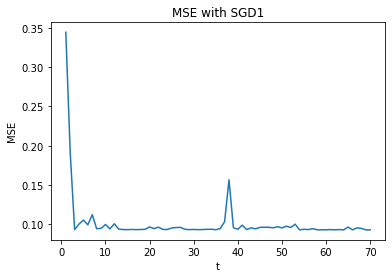

W = [ 2.07625352  0.47774205  2.96044576 -0.05663001] 	 MSE = 0.09299078635466838 	 Learning rate = 0.018


In [12]:
def SGD1(X, y, Eta, W):
    p = np.dot(X, W)
    dW = -2 * np.dot(y - p, X)
    W = W - dW * Eta
    return W
m = X.shape[0]
Xtest = np.c_[X, np.ones(m)]
ytest = y
Eta = 0.018
Wtest = W
for i in range(70):
    Wtest = SGD1(Xtest[300 + i, :], ytest[300 + i], Eta, Wtest)
    if i == 0:
        meanW = Wtest
        p = np.dot(Xtest, meanW)
        MSE = np.array(np.sum(np.power((ytest - p), 2)) / m)
    else:
        meanW = i / (i + 1) * meanW + 1 / (i + 1) * Wtest
        p = np.dot(Xtest, meanW)
        MSE = np.append(MSE, np.sum(np.power((y - p), 2)) / m)
fig = plt.figure()
plt.plot(np.array(range(70)) + 1, MSE)
plt.title('MSE with SGD1')
plt.xlabel('t')
plt.ylabel('MSE')
plt.show()
print('W =', meanW,'\t', 'MSE =', MSE[-1],'\t', 'Learning rate =', Eta)

Please write your code for implementing type 2 SGD (eta-variable type) below.

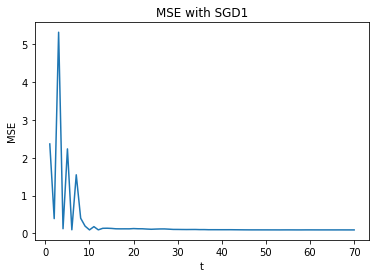

W = [2.06839727e+00 6.08551849e-01 2.83627162e+00 2.88536508e-04] 	 MSE = 0.09145476204301962 	 Learning rate = 0.055


In [13]:
def SGD2(X, y, Eta, W, t):
    p = np.dot(X, W)
    dW = -2 * np.dot(y - p, X)
    W = W - dW * Eta / np.sqrt(t)
    return W
m = X.shape[0]
Xtest = np.c_[X, np.ones(m)]
ytest = y
Eta = 0.055
Wtest = W
for i in range(70):
    Wtest = SGD2(Xtest[300 + i, :], ytest[300 + i], Eta, Wtest, i + 1)
    if i == 0:
        meanW = Wtest
        p = np.dot(Xtest, meanW)
        MSE = np.array(np.sum(np.power((ytest - p), 2)) / m)
    else:
        meanW = i / (i + 1) * meanW + 1 / (i + 1) * Wtest
        p = np.dot(Xtest, meanW)
        MSE = np.append(MSE, np.sum(np.power((y - p), 2)) / m)
fig = plt.figure()
plt.plot(np.array(range(70)) + 1, MSE)
plt.title('MSE with SGD1')
plt.xlabel('t')
plt.ylabel('MSE')
plt.show()
print('W =', meanW,'\t', 'MSE =', MSE[-1],'\t', 'Learning rate =', Eta)

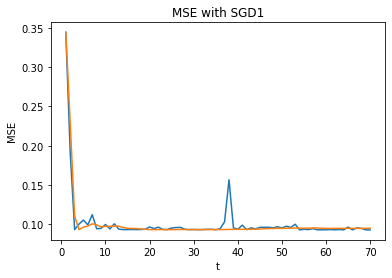

In [14]:
fig = plt.figure()
m = X.shape[0]
Xtest = np.c_[X, np.ones(m)]
ytest = y
Eta = 0.018
Wtest = W
for i in range(70):
    Wtest = SGD1(Xtest[300 + i, :], ytest[300 + i], Eta, Wtest)
    if i == 0:
        meanW = Wtest
        p = np.dot(Xtest, meanW)
        MSE = np.array(np.sum(np.power((ytest - p), 2)) / m)
    else:
        meanW = i / (i + 1) * meanW + 1 / (i + 1) * Wtest
        p = np.dot(Xtest, meanW)
        MSE = np.append(MSE, np.sum(np.power((y - p), 2)) / m)
plt.plot(np.array(range(70)) + 1, MSE)
m = X.shape[0]
Xtest = np.c_[X, np.ones(m)]
ytest = y
Eta = 0.018
Wtest = W
for i in range(70):
    Wtest = SGD2(Xtest[300 + i, :], ytest[300 + i], Eta, Wtest, i + 1)
    if i == 0:
        meanW = Wtest
        p = np.dot(Xtest, meanW)
        MSE = np.array(np.sum(np.power((ytest - p), 2)) / m)
    else:
        meanW = i / (i + 1) * meanW + 1 / (i + 1) * Wtest
        p = np.dot(Xtest, meanW)
        MSE = np.append(MSE, np.sum(np.power((y - p), 2)) / m)
plt.plot(np.array(range(70)) + 1, MSE)
plt.title('MSE with SGD1')
plt.xlabel('t')
plt.ylabel('MSE')
plt.show()